In [2]:
import pandas as pd


# Step 1: Load the dataset
df_chats = pd.read_csv('cleaned_data/chats_clean.csv',parse_dates=['created_at'])

In [3]:
df_chats

,id,client_id,question,answer,created_at,updated_at,bot_id,type,image_url,audio_url,has_image,has_audio
0,1,1,do you recommend traveling to beirut right now?,Traveling to Beirut can be a wonderful experie...,2024-08-19 14:44:14,2024-08-19 14:44:14,0,text,NaN,NaN,0,0
1,2,1,when is the next flight going to italy?,The next flight from Beirut Airport to Italy i...,2024-08-19 14:45:19,2024-08-19 14:45:19,0,text,NaN,NaN,0,0
2,3,1,"hello, tell me more about yourself",Hello! I'm here to assist you with your travel...,2024-08-19 14:52:22,2024-08-19 14:52:22,0,text,NaN,NaN,0,0
3,4,1,hello tell me more about yourself,"Hello! I am your traveler assistant, here to h...",2024-08-19 14:53:10,2024-08-19 14:53:10,0,text,NaN,NaN,0,0
4,5,1,who developed you,I was developed by Ibrahim Fleifel at Xpertbot...,2024-08-19 14:53:28,2024-08-19 14:53:28,0,text,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11016,11344,1,Hi,"Sorry, there was an error processing your requ...",2025-07-10 23:17:52,2025-07-10 23:17:52,2,text,NaN,NaN,0,0
11017,11345,1,How are you?,"Sorry, there was an error processing your requ...",2025-07-10 23:18:08,2025-07-10 23:18:08,2,text,NaN,NaN,0,0
11018,11346,1,Who are u?,"Sorry, there was an error processing your requ...",2025-07-10 23:18:18,2025-07-10 23:18:18,2,text,NaN,NaN,0,0
11019,11347,724,the flights today from spain to lebanon,"Sorry, there was an error processing your requ...",2025-07-12 19:35:12,2025-07-12 19:35:12,2,text,NaN,NaN,0,0


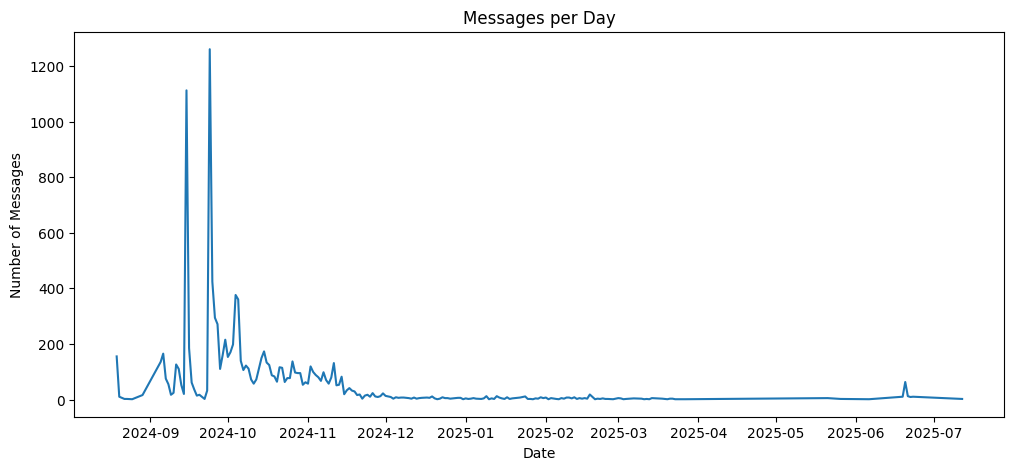

In [4]:
import matplotlib.pyplot as plt

df_chats['created_at'] = pd.to_datetime(df_chats['created_at'])


messages_per_day = df_chats.groupby(df_chats['created_at'].dt.date).size()

plt.figure(figsize=(12,5))
messages_per_day.plot()
plt.title("Messages per Day")
plt.xlabel("Date")
plt.ylabel("Number of Messages")
plt.show()

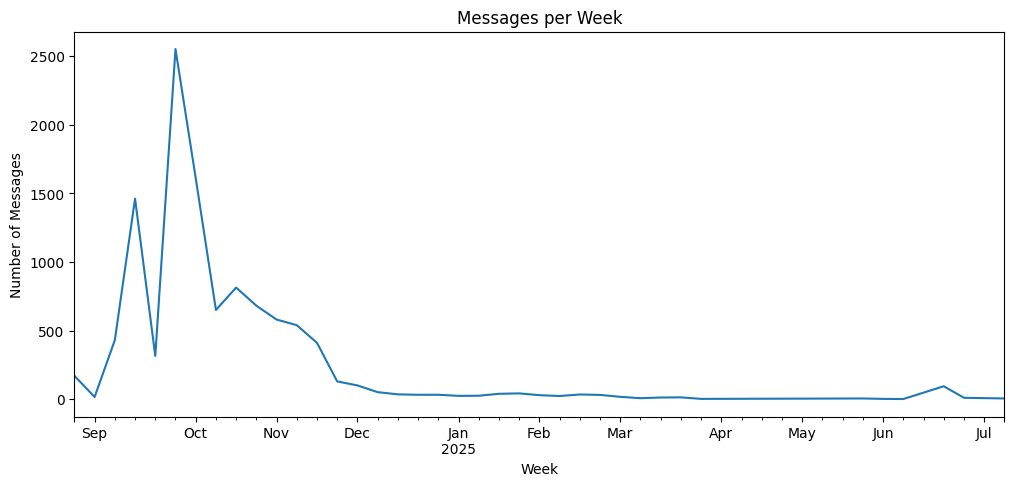

In [5]:
messages_per_week = df_chats.groupby(df_chats['created_at'].dt.to_period('W')).size()
plt.figure(figsize=(12,5))
messages_per_week.plot()
plt.title("Messages per Week")
plt.xlabel("Week")
plt.ylabel("Number of Messages")
plt.show()

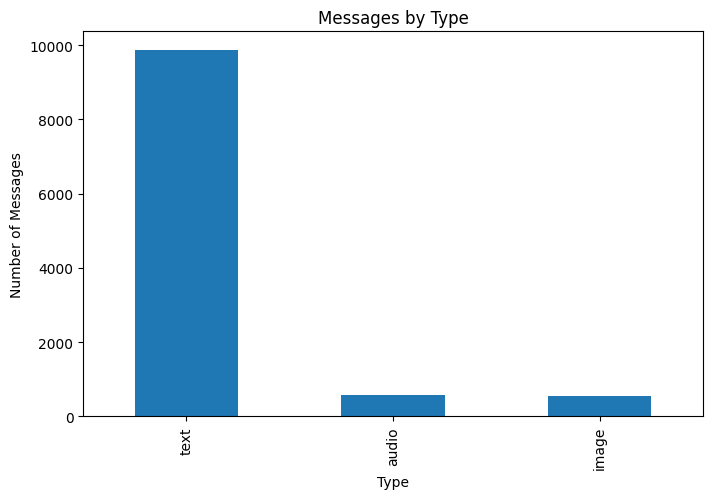

In [6]:
# messages by type
message_type_counts = df_chats['type'].value_counts()

plt.figure(figsize=(8,5))
message_type_counts.plot(kind='bar')
plt.title("Messages by Type")
plt.xlabel("Type")
plt.ylabel("Number of Messages")
plt.show()

In [9]:
#most active users

client_message_counts = df_chats['client_id'].value_counts().reset_index()
client_message_counts.columns = ['client_id', 'message_count']

client_message_counts.to_csv("reports/user_activity.csv", index=False)

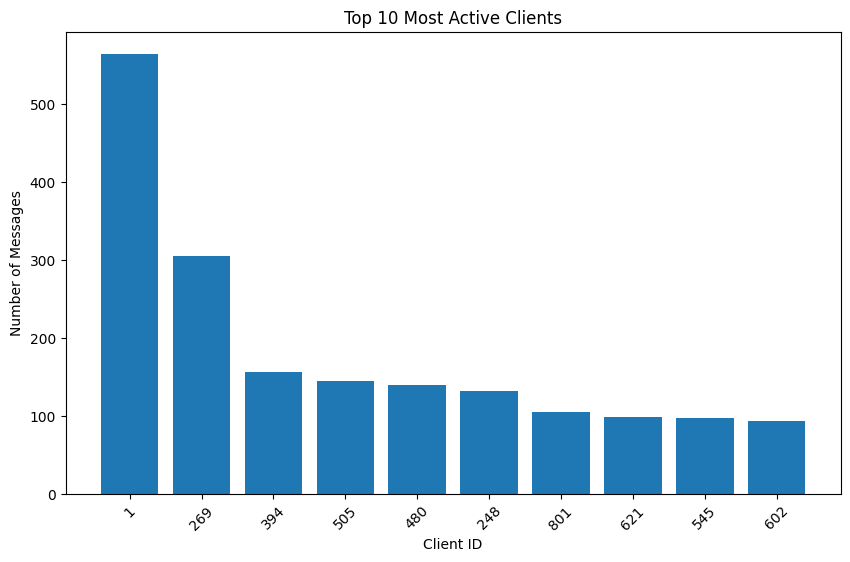

In [10]:
top_clients = client_message_counts.head(10)

plt.figure(figsize=(10,6))
plt.bar(top_clients['client_id'].astype(str), top_clients['message_count'])
plt.title("Top 10 Most Active Clients")
plt.xlabel("Client ID")
plt.ylabel("Number of Messages")
plt.xticks(rotation=45)
plt.show()

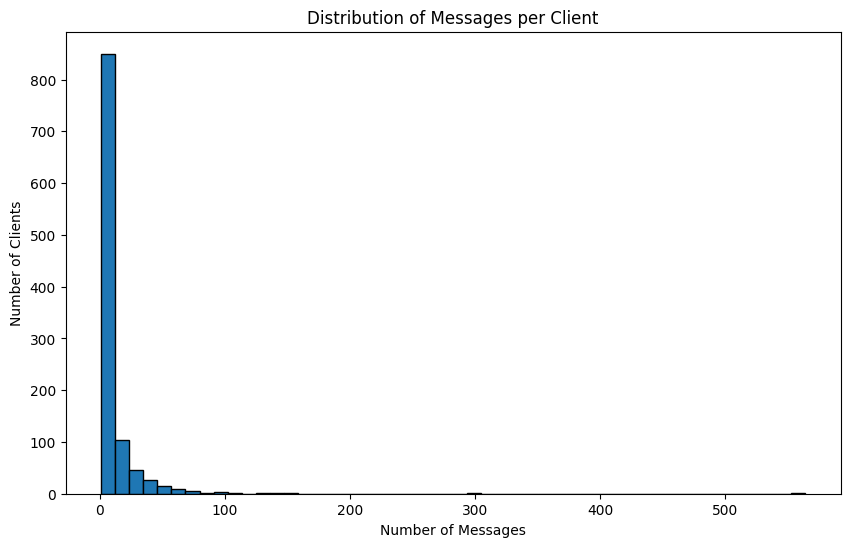

In [11]:
# ---- 3. Distribution of activity ----
plt.figure(figsize=(10,6))
plt.hist(client_message_counts['message_count'], bins=50, edgecolor='black')
plt.title("Distribution of Messages per Client")
plt.xlabel("Number of Messages")
plt.ylabel("Number of Clients")
plt.show()